In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hasithachathuranga
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:10<00:00, 21.2MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

In [ ]:
train_data_dir = "/content/cat-and-dog/training_set/training_set"
test_data_dir = "/content/cat-and-dog/test_set/test_set"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset = 'training',
                                                         validation_split=0.1,
                                                         seed=42)
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                              batch_size=BATCH_SIZE,
                                                              image_size= IMAGE_SIZE,
                                                              subset ='validation',
                                                              validation_split=0.1,
                                                              seed=42
                                                              )


test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE)



Found 8005 files belonging to 2 classes.
Using 7205 files for training.
Found 8005 files belonging to 2 classes.
Using 800 files for validation.
Found 2023 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


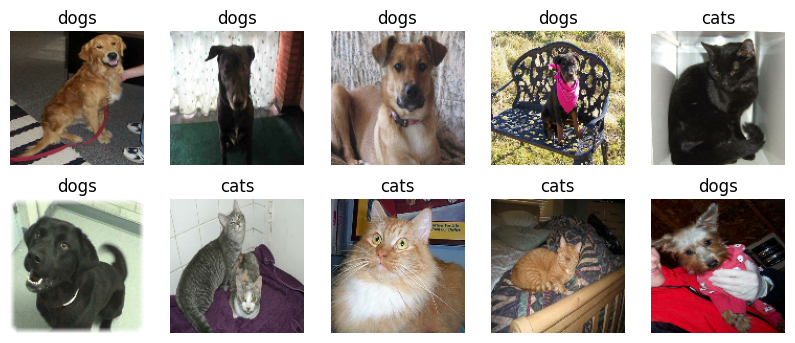

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[227.95229   235.95229   248.91356  ]
   [230.13911   238.13911   249.13911  ]
   [221.26953   230.26953   239.26953  ]
   ...
   [214.03568   221.21146   228.09036  ]
   [203.23047   212.67969   226.33203  ]
   [217.91696   227.36618   240.96043  ]]

  [[213.65524   221.65524   234.65524  ]
   [210.        218.        229.       ]
   [212.61606   221.61606   230.61606  ]
   ...
   [210.92683   217.92683   225.92683  ]
   [186.36177   195.36177   203.66646  ]
   [191.98476   200.98476   209.28944  ]]

  [[213.        221.        234.       ]
   [213.        221.        232.       ]
   [213.        222.        231.       ]
   ...
   [163.92838   168.32594   179.39626  ]
   [161.15009   167.4118    176.15009  ]
   [149.52092   155.78264   164.52092  ]]

  ...

  [[115.046036  118.53822    87.78432  ]
   [176.96849   180.99445   148.0204   ]
   [143.98785   145.53893   107.2231   ]
   ...
   [141.9365    155.22469   101.09274  ]
   [127.72743   129.8329     82.8329   ]
   [1

In [ ]:
train_data = train_data.map(lambda x,y : (x/255,y))
validation_data = validation_data.map(lambda x,y: (x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.33503622 0.36991674 0.36723596]
   [0.42458174 0.45595428 0.46379742]
   [0.4147875  0.44409204 0.46206078]
   ...
   [0.33555454 0.07814786 0.1428206 ]
   [0.35196546 0.10472747 0.1713313 ]
   [0.34928566 0.11754546 0.18804178]]

  [[0.38340682 0.41828734 0.41560656]
   [0.39786005 0.4292326  0.43707573]
   [0.401447   0.43075153 0.4487203 ]
   ...
   [0.28808916 0.10912188 0.1871472 ]
   [0.3059836  0.14978087 0.22997855]
   [0.2577681  0.13990659 0.2105239 ]]

  [[0.37206912 0.40694964 0.40426886]
   [0.42226574 0.4536383  0.46148142]
   [0.38286552 0.41217005 0.4301388 ]
   ...
   [0.09459683 0.03303127 0.12276779]
   [0.18588915 0.1475848  0.24141164]
   [0.42293176 0.42452487 0.50729144]]

  ...

  [[0.14467163 0.18047377 0.17100686]
   [0.19738734 0.23625094 0.21755467]
   [0.19790219 0.23161574 0.20366473]
   ...
   [0.11177057 0.31365752 0.34909502]
   [0.17935851 0.40862486 0.37733644]
   [0.22516347 0.37726715 0.33587372]]

  [[0.24286464 0.30265322 0.377881

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal", input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
226/226 [==============================] - 247s 1s/step - loss: 0.6869 - accuracy: 0.5768 - val_loss: 0.6964 - val_accuracy: 0.5050
Epoch 2/20
226/226 [==============================] - 237s 1s/step - loss: 0.6417 - accuracy: 0.6219 - val_loss: 0.6456 - val_accuracy: 0.6237
Epoch 3/20
226/226 [==============================] - 236s 1s/step - loss: 0.6232 - accuracy: 0.6483 - val_loss: 0.6181 - val_accuracy: 0.6637
Epoch 4/20
226/226 [==============================] - 233s 1s/step - loss: 0.6017 - accuracy: 0.6691 - val_loss: 0.5925 - val_accuracy: 0.7050
Epoch 5/20
226/226 [==============================] - 233s 1s/step - loss: 0.5820 - accuracy: 0.6933 - val_loss: 0.6637 - val_accuracy: 0.6425
Epoch 6/20
226/226 [==============================] - 234s 1s/step - loss: 0.5667 - accuracy: 0.7031 - val_loss: 0.6743 - val_accuracy: 0.6325
Epoch 7/20
226/226 [==============================] - 228s 1s/step - loss: 0.5623 - accuracy: 0.7046 - val_loss: 0.5306 - val_accuracy: 0.7337

In [ ]:
history.history

{'loss': [0.664480447769165,
  0.6374515295028687,
  0.608433187007904,
  0.5941911339759827,
  0.5791963934898376,
  0.5507274866104126,
  0.5461357235908508,
  0.5249015688896179,
  0.5176998376846313,
  0.5036810636520386,
  0.4858984351158142,
  0.4823383688926697,
  0.4696204960346222,
  0.4629013240337372,
  0.4508240818977356,
  0.45207884907722473,
  0.4395262598991394,
  0.425173282623291,
  0.43009769916534424,
  0.418011873960495],
 'accuracy': [0.6051353216171265,
  0.6341429352760315,
  0.6650936603546143,
  0.6838306784629822,
  0.7021512985229492,
  0.7182512283325195,
  0.7199167013168335,
  0.7379597425460815,
  0.7464261054992676,
  0.7554476261138916,
  0.7639139294624329,
  0.7666897773742676,
  0.7759888768196106,
  0.7789035439491272,
  0.7912560701370239,
  0.7854267954826355,
  0.7959750294685364,
  0.7983344793319702,
  0.8015267252922058,
  0.8013879060745239],
 'val_loss': [0.6495882272720337,
  0.6499937176704407,
  0.6620004177093506,
  0.6358218789100647,


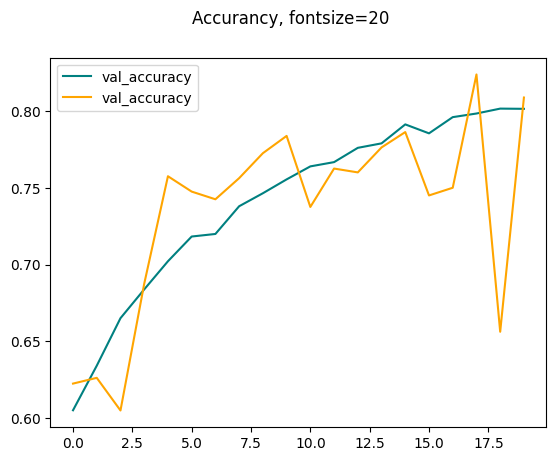

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='val_accuracy')
plt.plot(history.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accurancy, fontsize=20')
plt.legend()
plt.show()

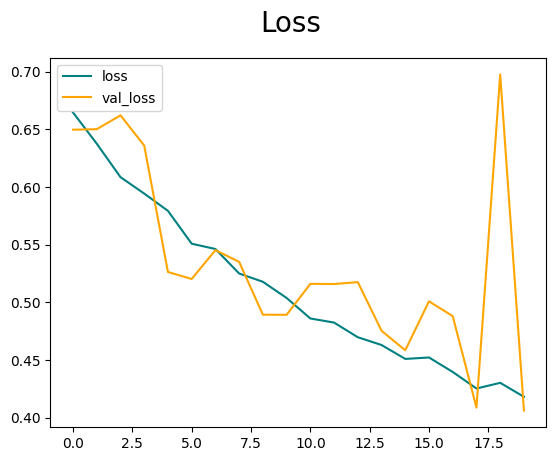

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 295ms/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8306878>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7756917>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.80869997>

In [ ]:
!pip install opencv.python

In [ ]:
import cv2

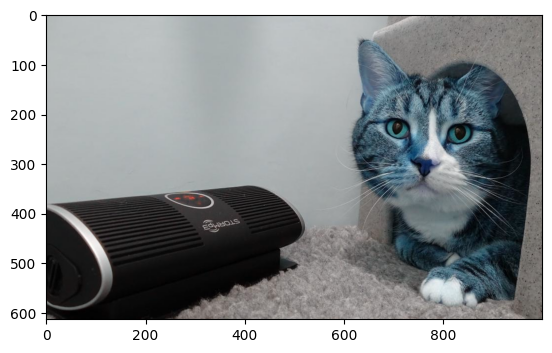

In [ ]:
image = cv2.imread("/content/b.jpg")
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image,IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.05241723, 0.08415743, 0.09806674],
        [0.05565856, 0.08739875, 0.10130807],
        [0.05891568, 0.09065588, 0.10456519],
        ...,
        [0.07607374, 0.19781087, 0.28050083],
        [0.06560034, 0.171532  , 0.22886029],
        [0.07835143, 0.17105976, 0.2120524 ]],

       [[0.05820145, 0.08032155, 0.07639998],
        [0.0552416 , 0.0773617 , 0.07344013],
        [0.05238971, 0.07450981, 0.07058824],
        ...,
        [0.04635417, 0.14355014, 0.24894302],
        [0.02139222, 0.09618039, 0.17336306],
        [0.02369864, 0.08102094, 0.13671014]],

       [[0.05536152, 0.0855239 , 0.09070136],
        [0.05989512, 0.08730014, 0.09499081],
        [0.05439645, 0.07555147, 0.08893876],
        ...,
        [0.05522724, 0.1608633 , 0.3032947 ],
        [0.06712694, 0.1548888 , 0.28169566],
        [0.20370688, 0.27061865, 0.39059412]],

       ...,

       [[0.14663038, 0.14975537, 0.17224313],
        [0.11

In [ ]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [ ]:
y_hat = model.predict(np.expand_dims(scaled_image,0))

1/1 [==============================] - 0s 22ms/step


In [ ]:
y_hat

array([[0.9057292]], dtype=float32)

In [ ]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs


In [ ]:
 model.save("cat_dog_classifier1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
